In [83]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

In [40]:
df1=pd.read_csv("Train.csv")
df1

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


# Data Cleaning

 Checking columns for null values.

In [41]:
print(df1.columns)
print(df1.shape)
print(df1.dtypes)

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')
(8523, 12)
Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object


In [42]:
print(df1.isnull().sum())

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64


Filling null values in data with mean and mode

In [43]:
percent = df1.isnull().sum() / 100

In [44]:
percent

Item_Identifier               0.00
Item_Weight                  14.63
Item_Fat_Content              0.00
Item_Visibility               0.00
Item_Type                     0.00
Item_MRP                      0.00
Outlet_Identifier             0.00
Outlet_Establishment_Year     0.00
Outlet_Size                  24.10
Outlet_Location_Type          0.00
Outlet_Type                   0.00
Item_Outlet_Sales             0.00
dtype: float64

In [45]:
df1['Item_Weight'].fillna(df1['Item_Weight'].mean(),inplace=True)

Changing categorical to numerical data for filling the missing values

In [46]:
df1['Outlet_Size'].replace(to_replace="Small",value=0,inplace=True)
df1['Outlet_Size'].replace(to_replace="Medium",value=1,inplace=True)
df1['Outlet_Size'].replace(to_replace="High",value=2,inplace=True)


In [47]:
df1['Outlet_Size'].fillna(df1['Outlet_Size'].mode()[0],inplace=True)
df1

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,1.0,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,1.0,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,1.0,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,1.0,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,2.0,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,2.0,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,1.0,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,0.0,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,1.0,Tier 3,Supermarket Type2,1845.5976


In [48]:
df1['Outlet_Size'].replace(to_replace=0,value="Small",inplace=True)
df1['Outlet_Size'].replace(to_replace=1,value="Medium",inplace=True)
df1['Outlet_Size'].replace(to_replace=2,value="High",inplace=True)

# Data Transformation

# Univariate Analysis

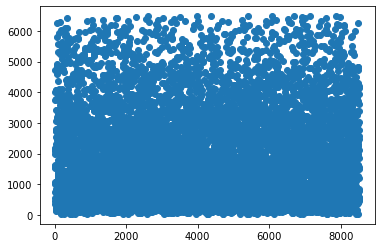

In [69]:
plt.scatter(df1.index,df1['Item_Outlet_Sales'])

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='count'>

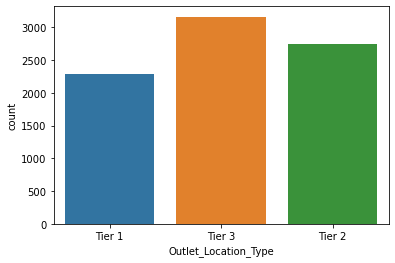

In [70]:
sns.countplot(x='Outlet_Location_Type',data=df1)

Checking for outliers

<AxesSubplot:xlabel='Item_Weight'>

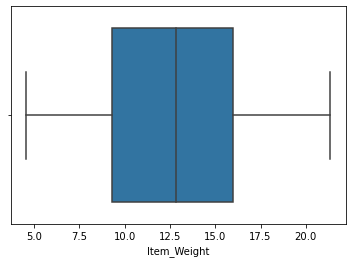

In [49]:
sns.boxplot(x='Item_Weight',data=df1)

<AxesSubplot:xlabel='Item_Visibility'>

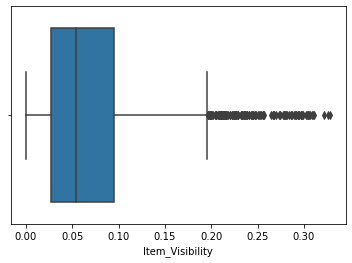

In [50]:
sns.boxplot(x='Item_Visibility',data=df1)

<AxesSubplot:xlabel='Item_MRP'>

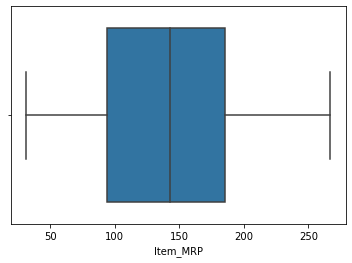

In [51]:
sns.boxplot(x='Item_MRP',data=df1)

<AxesSubplot:xlabel='Outlet_Establishment_Year'>

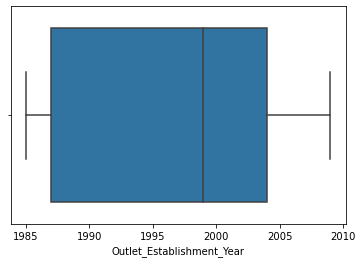

In [52]:
sns.boxplot(x='Outlet_Establishment_Year',data=df1)

<AxesSubplot:xlabel='Item_Outlet_Sales'>

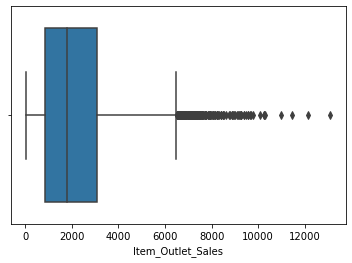

In [53]:
sns.boxplot(x='Item_Outlet_Sales',data=df1)

Removing outliers for 'Item_Visibility' & "Item_Outlet_Sales'" columns

In [54]:
outliers_columns = ["Item_Visibility", "Item_Outlet_Sales"] 

Q1 = df1[outliers_columns].quantile(0.25)
Q3 = df1[outliers_columns].quantile(0.75)
IQR = Q3 - Q1

df1 = df1[~((df1[outliers_columns] < (Q1 - 1.5 * IQR)) | (df1[outliers_columns] > (Q3 + 1.5 * IQR))).any(axis=1)]
df1.shape

(8193, 12)

Encoding columns Item_Type & Outlet_Size

In [55]:
# Extacting top 10 frequent categories
top_categorical = list(df1["Item_Type"].value_counts().sort_values(ascending=False).head(10).index)

# Keep category same if it is in top 10, change to "other" otherwise
df1.loc[~df1["Item_Type"].isin(top_categorical), "Item_Type"] = "other"

# Extacting top 10 frequent categories
top_country = list(df1["Outlet_Type"].value_counts().sort_values(ascending=False).head(10).index)

# Keep category same if it is in top 10, change to "other" otherwise
df1.loc[~df1["Outlet_Type"].isin(top_country), "Outlet_Type"] = "other"

# Creating one hot encoder
one_hot_encoder = OneHotEncoder(handle_unknown="ignore", sparse=False)

# Setting target columns
target_columns = ["Item_Type", "Outlet_Type"]

# Applying one hot encoding to each target column
one_hot_columns = pd.DataFrame(one_hot_encoder.fit_transform(df1[target_columns]))

# One hot encoding remove index, putting it back
one_hot_columns.index = df1.index

# Updating names of one hot encoded columns
array = ["Item_Type" + column for column in top_categorical]
array.extend(["Outlet_Type" + column for column in top_country])
array.append("Outlet_Type_other")
one_hot_columns.columns = array

# Removing categorical columns (Will replace with one hot encoded columns)
numerical_data = df1.drop(target_columns, axis=1)

# Adding one hot encoded columns to data
df1 = pd.concat([numerical_data, one_hot_columns], axis=1)

df1.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,...,Item_TypeCanned,Item_TypeBaking Goods,Item_TypeHealth and Hygiene,Item_TypeSoft Drinks,Item_TypeMeat,Outlet_TypeSupermarket Type1,Outlet_TypeGrocery Store,Outlet_TypeSupermarket Type2,Outlet_TypeSupermarket Type3,Outlet_Type_other
0,FDA15,9.30,Low Fat,0.016047,249.8092,OUT049,1999,Medium,Tier 1,3735.1380,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,DRC01,5.92,Regular,0.019278,48.2692,OUT018,2009,Medium,Tier 3,443.4228,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,FDN15,17.50,Low Fat,0.016760,141.6180,OUT049,1999,Medium,Tier 1,2097.2700,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,FDX07,19.20,Regular,0.000000,182.0950,OUT010,1998,Medium,Tier 3,732.3800,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,NCD19,8.93,Low Fat,0.000000,53.8614,OUT013,1987,High,Tier 3,994.7052,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


Splitting dataset into numerical and categorical

In [56]:
df1_numerical_features = df1.select_dtypes(include='number')
df1_categorical_features = df1.select_dtypes(include='category')

In [57]:
df1_numerical_features = df1.select_dtypes(exclude='object')
df1_categorical_features = df1.select_dtypes(include='object')

In [58]:
df1_numerical_features

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_TypeFruits and Vegetables,Item_TypeSnack Foods,Item_TypeHousehold,Item_TypeFrozen Foods,Item_TypeDairy,Item_TypeCanned,Item_TypeBaking Goods,Item_TypeHealth and Hygiene,Item_TypeSoft Drinks,Item_TypeMeat,Outlet_TypeSupermarket Type1,Outlet_TypeGrocery Store,Outlet_TypeSupermarket Type2,Outlet_TypeSupermarket Type3,Outlet_Type_other
0,9.300,0.016047,249.8092,1999,3735.1380,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,5.920,0.019278,48.2692,2009,443.4228,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,17.500,0.016760,141.6180,1999,2097.2700,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,19.200,0.000000,182.0950,1998,732.3800,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,8.930,0.000000,53.8614,1987,994.7052,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0.056783,214.5218,1987,2778.3834,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
8519,8.380,0.046982,108.1570,2002,549.2850,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8520,10.600,0.035186,85.1224,2004,1193.1136,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8521,7.210,0.145221,103.1332,2009,1845.5976,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


Removing Duplicates

In [59]:
print(df1.duplicated().sum())
df1.drop_duplicates(inplace=True)
print(df1.duplicated().sum())

0
0


# Bivariate Analysis

<AxesSubplot:xlabel='Outlet_Size', ylabel='Item_Outlet_Sales'>

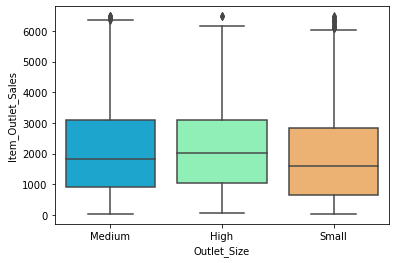

In [71]:
sns.boxplot(x='Outlet_Size',y='Item_Outlet_Sales',data=df1,palette='rainbow')

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='Item_Outlet_Sales'>

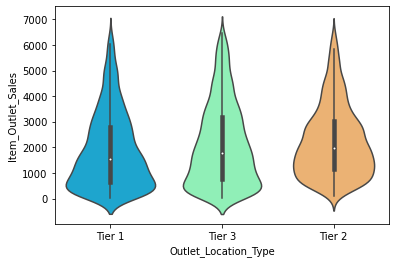

In [72]:
sns.violinplot(x="Outlet_Location_Type", y="Item_Outlet_Sales", data=df1,palette='rainbow')

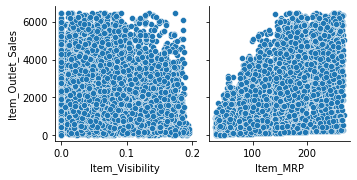

In [73]:
sns.pairplot(df1,x_vars=["Item_Visibility", "Item_MRP"],y_vars=["Item_Outlet_Sales"])

Final Dataset

In [74]:
df1

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,...,Item_TypeCanned,Item_TypeBaking Goods,Item_TypeHealth and Hygiene,Item_TypeSoft Drinks,Item_TypeMeat,Outlet_TypeSupermarket Type1,Outlet_TypeGrocery Store,Outlet_TypeSupermarket Type2,Outlet_TypeSupermarket Type3,Outlet_Type_other
0,FDA15,9.300,Low Fat,0.016047,249.8092,OUT049,1999,Medium,Tier 1,3735.1380,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,DRC01,5.920,Regular,0.019278,48.2692,OUT018,2009,Medium,Tier 3,443.4228,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,FDN15,17.500,Low Fat,0.016760,141.6180,OUT049,1999,Medium,Tier 1,2097.2700,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,FDX07,19.200,Regular,0.000000,182.0950,OUT010,1998,Medium,Tier 3,732.3800,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,NCD19,8.930,Low Fat,0.000000,53.8614,OUT013,1987,High,Tier 3,994.7052,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,214.5218,OUT013,1987,High,Tier 3,2778.3834,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
8519,FDS36,8.380,Regular,0.046982,108.1570,OUT045,2002,Medium,Tier 2,549.2850,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8520,NCJ29,10.600,Low Fat,0.035186,85.1224,OUT035,2004,Small,Tier 2,1193.1136,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8521,FDN46,7.210,Regular,0.145221,103.1332,OUT018,2009,Medium,Tier 3,1845.5976,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


# Preparation of Model

Splitting Dataset

In [75]:
X = df1_numerical_features.drop(labels=["Item_Outlet_Sales"], axis=1)
y = df1_numerical_features["Item_Outlet_Sales"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Scaling data

In [76]:
# Initiate scaler
standard_scaler = StandardScaler()

# Standardize the training dataset
X_train_scaled = pd.DataFrame(standard_scaler.fit_transform(X_train), index=X_train.index, columns=X_train.columns)

# Standardized the testing dataset
X_test_scaled = pd.DataFrame(standard_scaler.transform(X_test), index=X_test.index, columns=X_test.columns)

# Summary statistics after standardization
X_train_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
Item_Weight,6554.0,2.871648e-16,1.000076,-1.950927,-0.834774,0.002080,0.764770,1.999712
Item_Visibility,6554.0,-1.852179e-16,1.000076,-1.362729,-0.786817,-0.217613,0.632280,2.852122
Item_MRP,6554.0,3.463137e-16,1.000076,-1.755154,-0.754797,0.033473,0.724593,2.087670
Outlet_Establishment_Year,6554.0,1.215582e-14,1.000076,-1.575278,-1.334215,0.112164,0.714822,1.317479
Item_TypeFruits and Vegetables,6554.0,-2.142524e-16,1.000076,-0.286450,-0.286450,-0.286450,-0.286450,3.491006
Item_TypeSnack Foods,6554.0,-1.282330e-15,1.000076,-0.286450,-0.286450,-0.286450,-0.286450,3.491006
Item_TypeHousehold,6554.0,-1.605538e-16,1.000076,-0.292641,-0.292641,-0.292641,-0.292641,3.417160
Item_TypeFrozen Foods,6554.0,6.779238e-16,1.000076,-0.334632,-0.334632,-0.334632,-0.334632,2.988361
Item_TypeDairy,6554.0,-1.106835e-16,1.000076,-0.411730,-0.411730,-0.411730,-0.411730,2.428775
Item_TypeCanned,6554.0,-5.314469e-16,1.000076,-0.261669,-0.261669,-0.261669,-0.261669,3.821618


# Linear Regression

In [77]:
regressor=LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [78]:
y_pred=regressor.predict(X_test)

In [79]:
print("Train accuracy:", regressor.score(X_train, y_train) * 100)
print("Test accuracy:", regressor.score(X_test, y_test) * 100)

Train accuracy: 55.009956951330665
Test accuracy: 54.584719733608075


# Regularized Linear Regression

Regularized RIDGE Model

In [80]:
ridge = Ridge(alpha=.3)
ridge.fit(X_train,y_train)
print ("Ridge model:", (ridge.coef_))

Ridge model: [-2.42467994e+00 -7.82316355e+01  1.40630639e+01  1.47362438e+00
  5.88485223e+01  1.22484734e+01 -7.75587621e+01 -1.44312344e+01
  3.67149784e+01  1.23645340e+01 -2.20504953e+01  3.20167510e+01
 -7.26470808e+00 -5.57637616e+01  2.48757025e+01 -1.60269671e+03
  2.74880149e+02 -2.67853750e+01  1.35460194e+03]


In [81]:
print("Train accuracy:", ridge.score(X_train, y_train) * 100)
print("Test accuracy:", ridge.score(X_test, y_test) * 100)

Train accuracy: 55.009952934687675
Test accuracy: 54.58415775110031
